In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print("\nGPU Status:")
import tensorflow as tf
tf.test.gpu_device_name() #檢查GPU是否啟動，若無啟動則會自動改由CPU執


GPU Status:


'/device:GPU:0'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from matplotlib import pyplot as plt

In [ ]:
# 資料處理
df = pd.read_csv(r'drive/MyDrive/AI比賽專案/智慧農業/訓練資料/train_data.csv')
data = df.drop(['Unnamed: 0','d.log_time','actuator01','actuator02','actuator03','actuator04'
                ,'actuator05','actuator06','actuator07','actuator08','actuator09','actuator10'
                ,'actuator11'],axis=1)
label = df.loc[:,['actuator01','actuator02','actuator03','actuator04',
                  'actuator05','actuator06','actuator07','actuator08','actuator09','actuator10','actuator11']]
print(data.columns)
print(label.columns)
print(data.shape)
print(label.shape)
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    label, 
                                                    test_size=0.3, 
                                                    random_state=1)
print(X_train.shape,' ',y_train.shape)
print(X_test.shape,' ',y_test.shape)

Index(['d.temperature_A', 'd.temperature_B', 'd.humidity_A', 'd.humidity_B',
       'd.photometric', 'd.CO2', 'd.soil_temperature', 'd.soil_humidity',
       'd.soil_EC', 'd.soil_PH', 'd.outside_photometric',
       'd.outside_temperature', 'd.outside_humidity', 'd.wind_speed',
       'd.wind_direction', 'd.radiometric', 'd.rainfall_detect', 'd.rainfall'],
      dtype='object')
Index(['actuator01', 'actuator02', 'actuator03', 'actuator04', 'actuator05',
       'actuator06', 'actuator07', 'actuator08', 'actuator09', 'actuator10',
       'actuator11'],
      dtype='object')
(28493, 18)
(28493, 11)
(19945, 18)   (19945, 11)
(8548, 18)   (8548, 11)


In [ ]:
print(label[i].value_counts())

0    27781
1      712
Name: actuator11, dtype: int64


In [ ]:
'''
def get_models():
  for i in label.columns:
    print(i)
    for n in [1,5,20,40,60,100,150,200]:
      print('max depth = ',n)
      dtree = model = tree.DecisionTreeClassifier(criterion='gini',
                                                  max_depth=n,
                                                  random_state=2)
      model.fit(X_train,y_train[i])
      y_predict = model.predict(X_test)
      print('分類準確率 : ',accuracy_score(y_test[i],y_predict))
    print('###########################')
'''
def get_models(number):
  model = None
  if number == 'actuator01':
      model = tree.DecisionTreeClassifier(criterion='gini',
                                                  max_depth=10,
                                                  random_state=2)
  elif number == 'actuator02':
      model = tree.DecisionTreeClassifier(criterion='gini',
                                                  max_depth=10,
                                                  random_state=2)
  elif number == 'actuator03':
      model = tree.DecisionTreeClassifier(criterion='gini',
                                                  max_depth=10,
                                                  random_state=2)
  elif number == 'actuator04':
      model = tree.DecisionTreeClassifier(criterion='gini',
                                                  max_depth=10,
                                                  random_state=2)
  elif number == 'actuator10':
      model = tree.DecisionTreeClassifier(criterion='gini',
                                                  max_depth=5,
                                                  random_state=2)
  elif number == 'actuator11':
      model = tree.DecisionTreeClassifier(criterion='gini',
                                                  max_depth=3,
                                                  min_samples_leaf=3,
                                                  random_state=1)
  elif number == 'actuator05':
      model = tree.DecisionTreeClassifier(criterion='gini',
                                                  max_depth=10,                        
                                                  random_state=2)
  elif number == 'actuator06':
      model = tree.DecisionTreeClassifier(criterion='gini',
                                                  max_depth=10,
                                                  random_state=2)
  elif number == 'actuator07':
      model = tree.DecisionTreeClassifier(criterion='gini',
                                                  max_depth=10,
                                                  random_state=2)
  elif number == 'actuator09':
      model = tree.DecisionTreeClassifier(criterion='gini',
                                                  max_depth=20,
                                                  random_state=2)
  elif number == 'actuator08':
      model = tree.DecisionTreeClassifier(criterion='gini',
                                                  max_depth=10,
                                                  random_state=2)
  return model


models = dict()
i = 'actuator11'
models[i] = get_models(i)
models[i].fit(X_train,y_train[i])
y_predict = models[i].predict(X_test)
print(i,' : ')
print('分類準確率 : ',accuracy_score(y_test[i],y_predict))
print(classification_report(y_test[i],y_predict,target_names=['0','1']))
print('*******************')
'''
for i in label.columns:
  models[i] = get_models(i)
  models[i].fit(X_train,y_train[i])
  y_predict = models[i].predict(X_test)
  print(i,' : ')
  print('分類準確率 : ',accuracy_score(y_test[i],y_predict))
  print(classification_report(y_test[i],y_predict,target_names=['0','1']))
  print('*******************')
'''

actuator11  : 
分類準確率 :  0.9743799719232569
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      8324
           1       0.67      0.04      0.08       224

    accuracy                           0.97      8548
   macro avg       0.82      0.52      0.54      8548
weighted avg       0.97      0.97      0.96      8548

*******************


"\nfor i in label.columns:\n  models[i] = get_models(i)\n  models[i].fit(X_train,y_train[i])\n  y_predict = models[i].predict(X_test)\n  print(i,' : ')\n  print('分類準確率 : ',accuracy_score(y_test[i],y_predict))\n  print(classification_report(y_test[i],y_predict,target_names=['0','1']))\n  print('*******************')\n"

In [ ]:
# 資料預處理
print(y_test.shape)
test_label = []
for i in range(y_test.shape[0]):
  temp = y_test.iloc[i,:]
  test_label.append(list(temp))
print(len(test_label))

# 測試
list1 = ['actuator01','actuator02','actuator03','actuator04','actuator05','actuator06','actuator07','actuator08','actuator09','actuator10','actuator11']
count = 0 #總答對
temp2 = []
temp3 = []
for i in range(X_test.shape[0]):
  temp = []
  for n in list1: # 11
    data = X_test.iloc[i,:]
    data = np.array(data)
    data = data[np.newaxis,:]
    r = models[n].predict(data)
    temp.append(r[0])
  if temp == test_label[i]:
    count = count+1
  else:
    temp2.append(temp)
    temp3.append(test_label[i])
print(count)
print(count/len(test_label))

(8548, 11)
8548
6078
0.7110435189518016


In [ ]:
print(temp2[1])
print(temp3[1])

[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


In [ ]:
dot_data = export_graphviz(model,
                           filled=True,
                           rounded=True,
                           class_names=['0','1'],
                           feature_names=X_train.columns,
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png(r'drive/MyDrive/AI比賽專案/智慧農業/picture/tree.png')

True

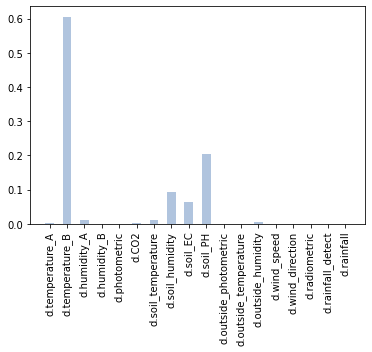

In [ ]:
plt.bar(X_train.columns,
        dtree.feature_importances_,
        width=0.5, 
        bottom=None, 
        align='center', 
        color=['lightsteelblue', ]
        )
plt.xticks(rotation='vertical')
plt.show()